# **Topic: 8 Time Series Analysis**
**Course Code: CSST104**

**Name: Simon B. Sancon**

**Section: BSCS-3B**

# **Importing Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import register_matplotlib_converters



# **Part 1: Dataset Preparation:**

**1.1 Loading Dataset**

In [ ]:
pollution_data = pd.read_csv("most-polluted-countries.csv")
#pollution_data.head()

**1.2 Handling Missing Values**

In [ ]:
pollution_missing = pollution_data.isnull().sum()
#print(pollution_missing)
pollution_no_missing = pollution_data.dropna()
#print(pollution_no_missing.isnull().sum())

**1.3 Simulate Time Series Data**

<ipython-input-34-e2ae0a8d3e7b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pollution_no_missing['Year'] = pd.date_range(start='2016-01-01', periods=len(pollution_no_missing), freq='M')


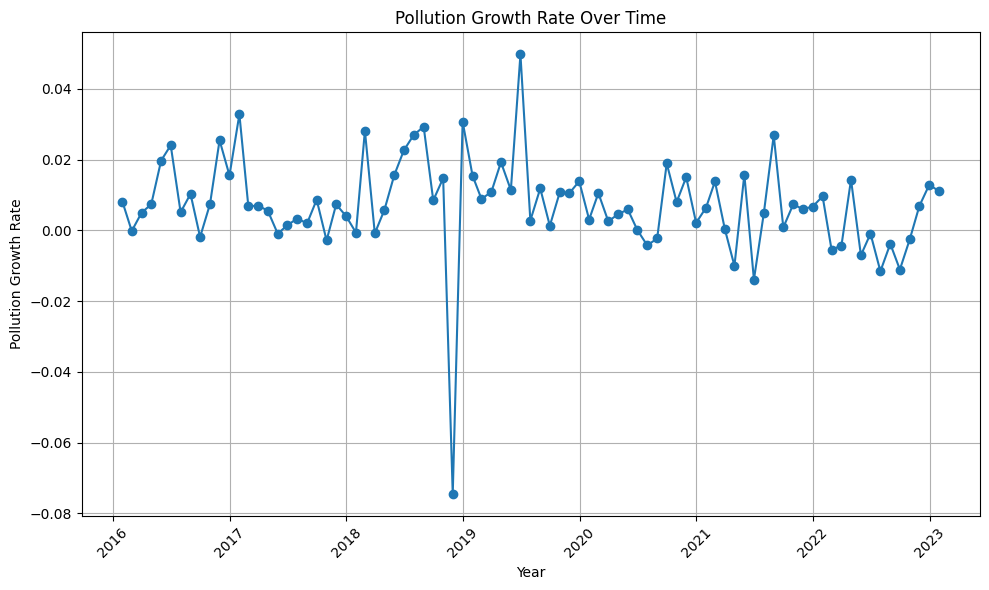

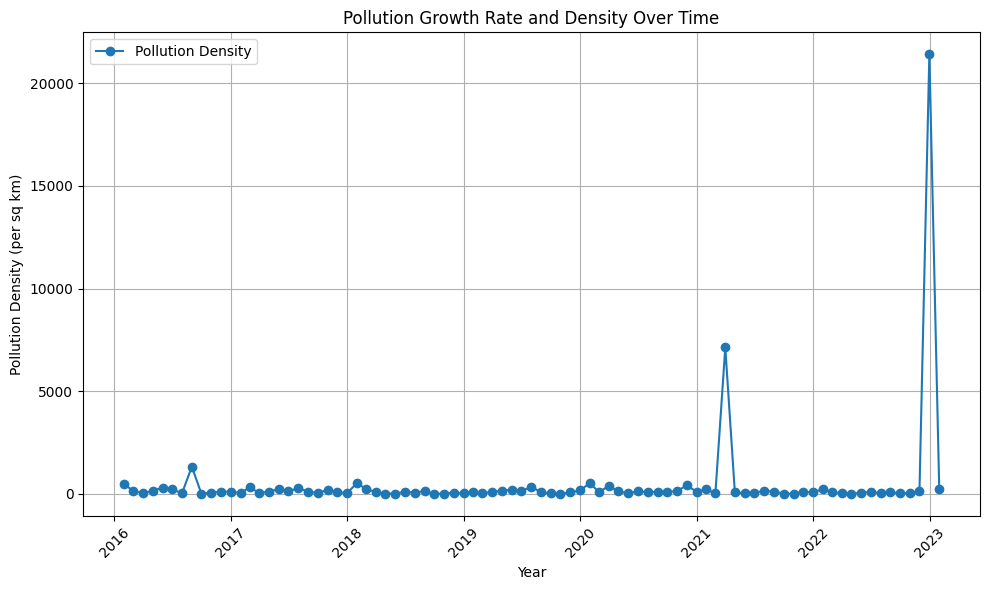

In [ ]:
# Generate a new date column
pollution_no_missing["Year"] = pd.date_range(start="2016-01-01", periods=len(pollution_no_missing), freq="M")
pollution_no_missing.tail()

# Plot the time series based on growth rate
plt.figure(figsize=(10, 6))
plt.plot(pollution_no_missing["Year"], pollution_no_missing["pollution_growth_Rate"], marker="o", linestyle="-")
plt.title("Pollution Growth Rate Over Time")
plt.xlabel("Year")
plt.ylabel("Pollution Growth Rate")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the time series based on pollution
plt.figure(figsize=(10, 6))
plt.plot(pollution_no_missing["Year"], pollution_no_missing["pollution_density_in_km"], marker="o", linestyle="-", label="Pollution Density")
plt.title("Pollution Growth Rate and Density Over Time")
plt.xlabel("Year")
plt.ylabel("Pollution Density (per sq km)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()


# **Part 2: Stationary Testing**

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Differencing to Make Stationarity while preserving the index
pollution_diff = pollution_no_missing["pollution_growth_Rate"].diff().dropna()
pollution_diff.index = pollution_no_missing["Year"].iloc[1:]  # Assigning the index from the original data to the differenced data

# Perform ADF test on differenced series
adf_test = adfuller(pollution_diff)
print("ADF Statistic:", adf_test[0])
print("p-value:", adf_test[1])

ADF Statistic: -5.101857416375888
p-value: 1.3898933312618878e-05


# **Part 3: ARIMA Model Identification**

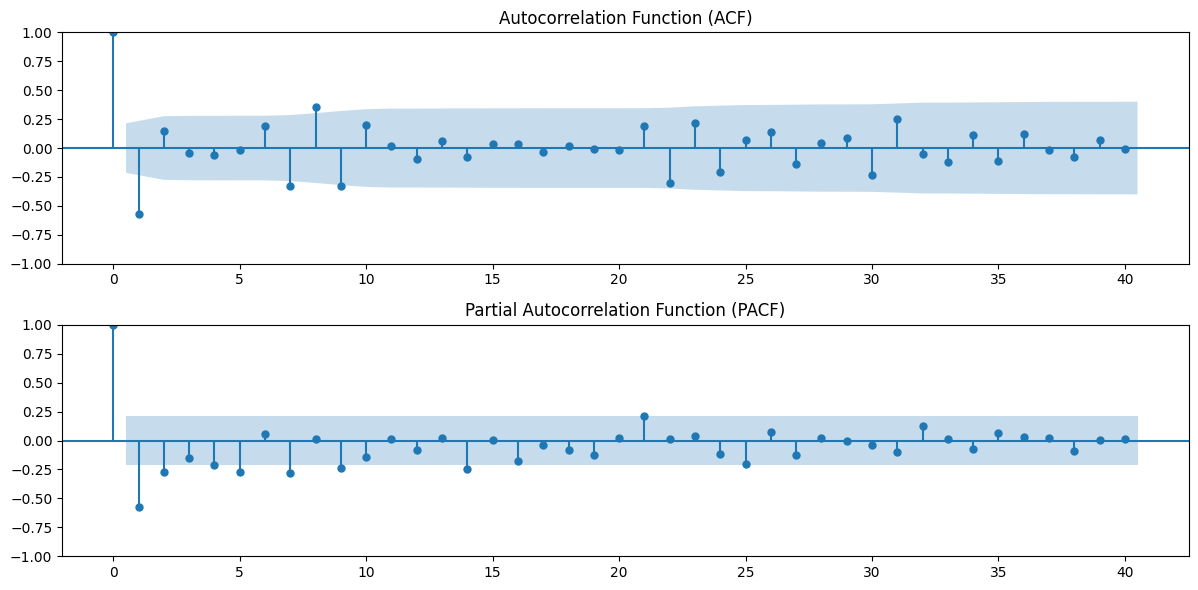

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Generate ACF and PACF plots for the differenced series
plt.figure(figsize=(12, 6))

# ACF plot
ax1 = plt.subplot(211)
plot_acf(pollution_diff, ax=ax1, lags=40)
plt.title("Autocorrelation Function (ACF)")

# PACF plot
ax2 = plt.subplot(212)
plot_pacf(pollution_diff, ax=ax2, lags=40)
plt.title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()


# **Part 4: Arima Model Fitting**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(pollution_diff, order=(1, 1, 1))

results = model.fit()
print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                 SARIMAX Results                                 
Dep. Variable:     pollution_growth_Rate   No. Observations:                   84
Model:                    ARIMA(1, 1, 1)   Log Likelihood                 218.966
Date:                   Fri, 29 Mar 2024   AIC                           -431.931
Time:                           10:34:39   BIC                           -424.675
Sample:                       02-29-2016   HQIC                          -429.016
                            - 01-31-2023                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5619      0.046    -12.321      0.000      -0.651      -0.473
ma.L1         -0.9993      4.341     -0.230      0.818      -9.507       7.508
sigma2         0.0003      0

# **Part 5: Forecasting**

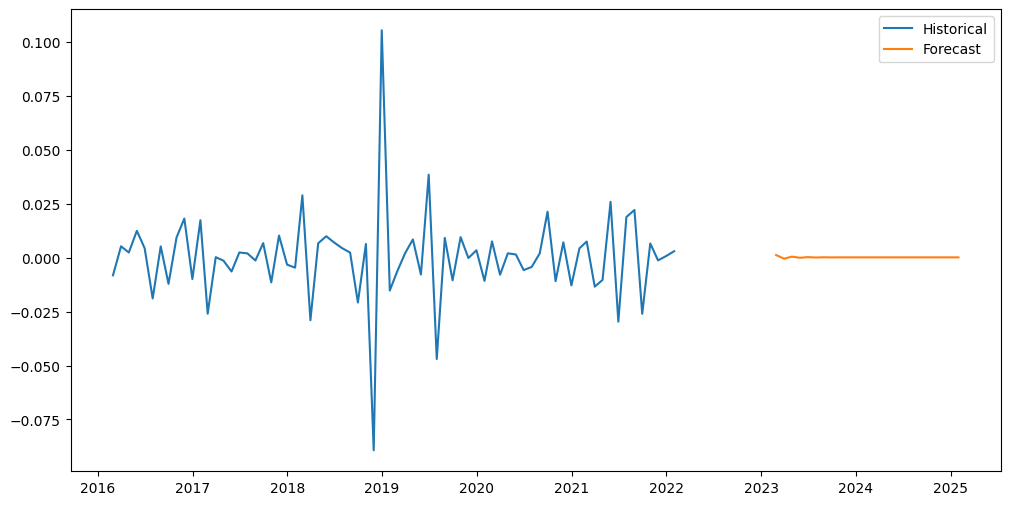

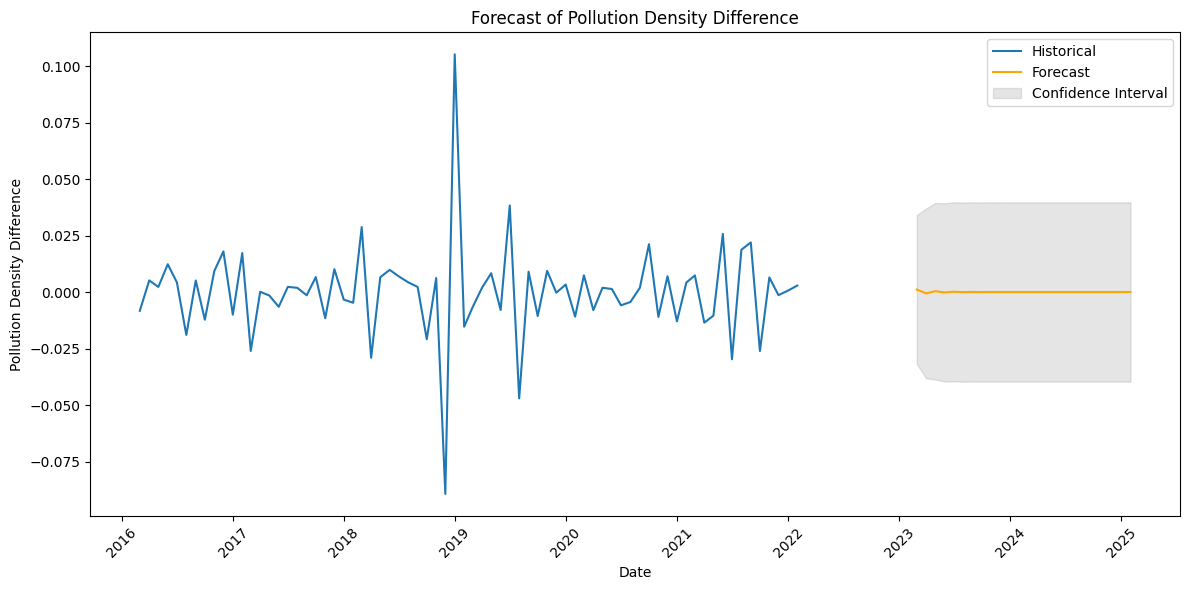

In [ ]:
forecast1 = results.forecast(steps=24)

plt.figure(figsize=(12,6))
plt.plot(pollution_diff.index[:-12], pollution_diff[:-12] , label= "Historical")
plt.plot(forecast1.index, forecast1, label= "Forecast")
plt.legend()
plt.show()

forecast = results.get_forecast(steps=24)

# Get the forecasted values
forecast_values = forecast.predicted_mean

# Get the confidence intervals
confidence_intervals = forecast.conf_int()

# Plot the forecast and confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(pollution_diff.index[:-12], pollution_diff[:-12], label="Historical")
plt.plot(forecast_values.index, forecast_values, label="Forecast", color='orange')
plt.fill_between(confidence_intervals.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='gray', alpha=0.2, label='Confidence Interval')
plt.xlabel("Date")
plt.ylabel("Pollution Density Difference")
plt.title("Forecast of Pollution Density Difference")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **6. Report and Insights**

In [ ]:
print("""
Data Preparation:
- Loaded the pollution dataset and handled missing values by dropping rows with missing values.
- Simulated time series data by generating a new date column.

Stationary Testing:
- Conducted Augmented Dickey-Fuller (ADF) test to assess stationarity.
- Applied differencing to make the time series stationary(selecting the growth rate variable in the process).
- I PerformedRepeated ADF test on the differenced series to confirm stationarity.

ARIMA Model Identification:
- Used Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots for visuzualization.

ARIMA Model Fitting:
- Fitted using ARIMA(1,1,1) parameters to the differenced time series data.

**Forecasting:**
- Forecasted future values of pollution for the next 2 years.
- Plotted the historical data along with the forecasted values and confidence intervals to visualize the forecast.
""")

print(""""
Real World Implication:
- The forcasting displayed a fine smoothline right down the middle
- This presents a less potential of spiking of the rate of the pollution anytime soon.
- This provides an insight for actions that prevent the repeatition of spiking since
the confidence displays the bracket similar to the past years. so in concluion the
pollution spike must repeat.
""")